<a href="https://colab.research.google.com/github/unclepeddy/deeplearning/blob/master/1-imdb-binary-classification/one_hot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! import tf-nightly-2.0-preview

In [4]:
import tensorflow as tf

from tensorflow.keras import metrics, models, layers, losses, optimizers
from tensorflow.keras.datasets import imdb

import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.0.0-dev20190330


In [0]:
# Restrict dataset to NUM_WORDS most frequent words
num_words = 10000
# Size of validation set
validation_size = 10000

# Import labeled traning and test data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=num_words)

# Given list of word sequences, return list of one-hot encoded lists
def vectorize_sequences(sequences, dimension=num_words):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

# Vectorize the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Set aside validation set
x_val = x_train[:validation_size]
y_val = y_train[:validation_size]
partial_x_train = x_train[validation_size:]
partial_y_train = y_train[validation_size:]

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 281us/sample - loss: 0.5217 - binary_accuracy: 0.7838 - val_loss: 0.3912 - val_binary_accuracy: 0.8615
Epoch 2/4
15000/15000 [==============================] - 3s 210us/sample - loss: 0.3087 - binary_accuracy: 0.8985 - val_loss: 0.3078 - val_binary_accuracy: 0.8837
Epoch 3/4
15000/15000 [==============================] - 3s 216us/sample - loss: 0.2261 - binary_accuracy: 0.9255 - val_loss: 0.2782 - val_binary_accuracy: 0.8917
Epoch 4/4
15000/15000 [==============================] - 3s 213us/sample - loss: 0.1821 - binary_accuracy: 0.9404 - val_loss: 0.2783 - val_binary_accuracy: 0.8886


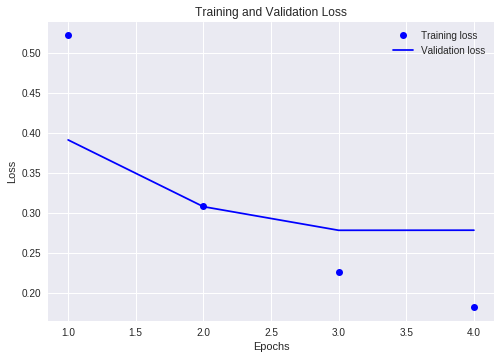

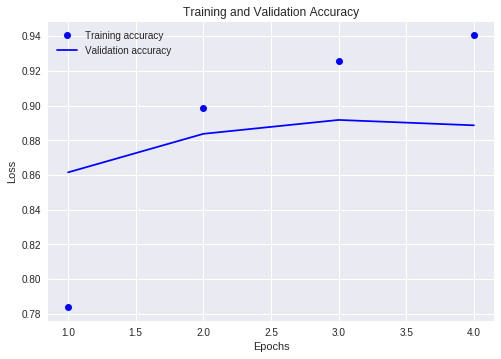

25000/25000 [==============================] - 4s 169us/sample - loss: 0.2976 - binary_accuracy: 0.8783
0.2976436975097656 0.87832


In [9]:
# Build simple model: dense w/ ReLU -> dense w/ ReLU -> sigmoid
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile and train the model
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))

# Capture training statistics
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
binary_accuracy = history_dict['binary_accuracy']
val_binary_accuracy = history_dict['val_binary_accuracy']

epochs = range(1, len(history_dict.get('binary_accuracy')) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(epochs, binary_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_binary_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model with the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(loss, accuracy)